100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.01it/s]


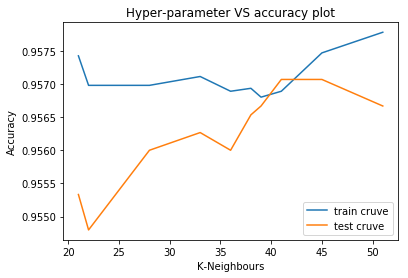

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random


import warnings
warnings.filterwarnings("ignore")


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


#colors = {0:'red', 1:'blue'}
#plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
#plt.show()



def generate_random_unique_values(val_len, min_val, max_val):
    '''This function generates random unique values using uniform distribution'''

    if (max_val - min_val) >= val_len:
        
        random_val = set()
        while len(random_val) < val_len:
            random_val.add(int(np.random.uniform(min_val,max_val)))
            
        return sorted(list(random_val))
    

def get_train_test_indices_foldwise(len_train, lst_train_indices, idx, folds):
    
    f = idx + 1
    group_size = int(len_train / folds)

    start_index = idx * group_size

    if f == folds:
        end_index = len_train
    else:
        end_index = (idx * group_size) + group_size

    
    test_indices = list(np.arange(start_index, end_index))

    train_indices = list(set(lst_train_indices) - set(test_indices))
    
    return train_indices, test_indices

        

def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    
    
    params = {'n_neighbors': generate_random_unique_values(10, param_range[0], param_range[1]) }
    
    
    len_train = len(x_train)
    lst_train_indices = list(np.arange(0, len_train))    
    
    trainscores = []
    testscores  = []
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        
        for idx in range(0, folds):
            
            train_indices, test_indices = get_train_test_indices_foldwise(len_train, lst_train_indices, idx, folds)
            
            _X_train = x_train[train_indices]
            _Y_train = y_train[train_indices]

            _X_test = x_train[test_indices]
            _Y_test = y_train[test_indices]
            
            
            # print(f'train_idx: {train_indices}\ntest_idx: {test_indices}')
            # print(f'train_data: {_X_train}\ntest_data: {_X_test}')
            # print('-'*50)
            
            classifier = KNeighborsClassifier(n_neighbors=k)
            #classifier.neighbors = k
            classifier.fit(_X_train, _Y_train)
            
            
            Y_predicted_from_train = classifier.predict(_X_train)            
            trainscores_folds.append(accuracy_score(_Y_train, Y_predicted_from_train))
            
            
            Y_predicted_from_test = classifier.predict(_X_test)              
            testscores_folds.append(accuracy_score(_Y_test, Y_predicted_from_test))


        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        
    #print(f'k: {k}\ntrain_scores: {np.mean(np.array(trainscores_folds))}\ntest_scores: {np.mean(np.array(testscores_folds))}')
    
    return trainscores, testscores, params['n_neighbors']



neigh = KNeighborsClassifier()
param_range = (20,60)
folds = 4
trainscores, testscores, params = RandomSearchCV(X_train, y_train, neigh, param_range, folds)

#print('-'*15, 'K-Neighbours', '-'*15)
#print(params)
#print('\n', '-'*15, 'Train scores', '-'*15)
#print(trainscores)
#print('\n', '-'*15, 'Test scores', '-'*15)
#print(testscores)

plt.plot(params, trainscores, label='train cruve')
plt.plot(params, testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel('K-Neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    



In [5]:

def plot_decision_boundary(X1, X2, y, clf):
        
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)    
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

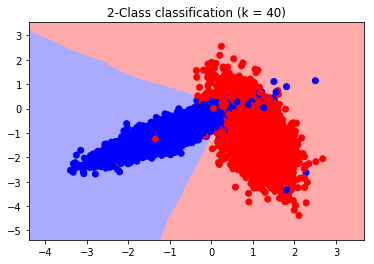

In [15]:
from matplotlib.colors import ListedColormap

neigh = KNeighborsClassifier(n_neighbors = 40)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [7]:
#Please give feedback.